<a href="https://colab.research.google.com/github/ABHINAV-GOPINADH/deep_Learning/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import yfinance as yf

df = yf.download('NFLX', start='2020-01-01', end='2025-06-01')
df.head()


<ipython-input-7-1173334717>:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('NFLX', start='2020-01-01', end='2025-06-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NFLX,NFLX,NFLX,NFLX,NFLX
Date,,,,,
2020-01-02,329.809998,329.980011,324.779999,326.100006,4485800
2020-01-03,325.899994,329.859985,325.529999,326.779999,3806900
2020-01-06,335.829987,336.359985,321.200012,323.119995,5663100
2020-01-07,330.750000,336.700012,330.299988,336.470001,4703200
2020-01-08,339.260010,342.700012,331.049988,331.489990,7104500


In [8]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,NFLX,NFLX,NFLX,NFLX,NFLX
Date,,,,,
2025-05-23,1185.390015,1191.449951,1179.439941,1184.000000,2186500
2025-05-27,1211.569946,1211.770020,1193.089966,1195.329956,2920500
2025-05-28,1208.550049,1215.910034,1206.020020,1210.270020,1855900
2025-05-29,1184.859985,1209.000000,1176.280029,1208.000000,3303100
2025-05-30,1207.229980,1211.810059,1180.930054,1198.329956,4696800


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

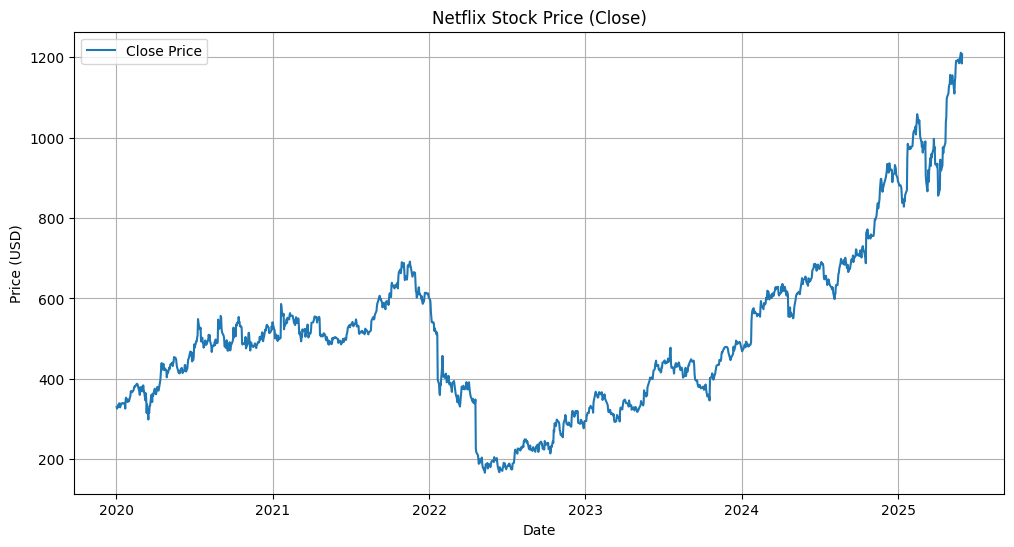

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Netflix Stock Price (Close)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


In [10]:
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()


In [11]:
df['Return'] = df['Close'].pct_change()

In [12]:
def compute_rsi(data, window=14):
    delta = data.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = compute_rsi(df['Close'])


In [13]:
df.dropna(inplace=True)

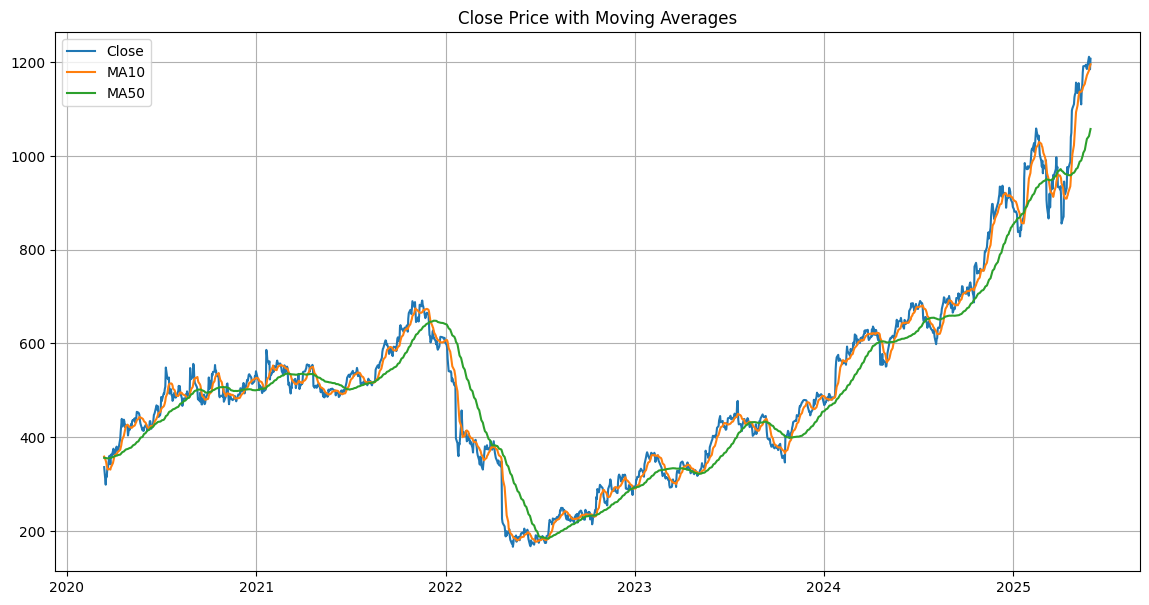

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close')
plt.plot(df['MA10'], label='MA10')
plt.plot(df['MA50'], label='MA50')
plt.title("Close Price with Moving Averages")
plt.legend()
plt.grid()
plt.show()


In [15]:
df['Future_Close'] = df['Close'].shift(-5)  # 5-day future close price
df['Future_Return'] = (df['Future_Close'] - df['Close']) / df['Close']


ValueError: Cannot set a DataFrame with multiple columns to the single column Future_Return